In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network

In [2]:
# https://github.com/pablobarbera/data-science-workshop/tree/master/sna/data

In [3]:
nodes_raw = pd.read_csv("https://raw.githubusercontent.com/pablobarbera/data-science-workshop/master/sna/data/congress-twitter-network-nodes.csv")
nodes_raw.head()

# 500+ congresspeople on twitter; 


,id_str,twitter,bioid,name,gender,chamber,party,followers_count
0,20209807,AnderCrenshaw,C001045,Ander Crenshaw,M,rep,Republican,9107
1,234797704,AustinScottGA08,S001189,Austin Scott,M,rep,Republican,8316
2,82453460,BennieGThompson,T000193,Bennie G. Thompson,M,rep,Democrat,5002
3,516880804,BettyMcCollum04,M001143,Betty McCollum,F,rep,Democrat,7211
4,74508260,BillPascrell,P000096,Bill Pascrell Jr.,M,rep,Democrat,5362


In [4]:
edges_raw = pd.read_csv("https://raw.githubusercontent.com/pablobarbera/data-science-workshop/master/sna/data/congress-twitter-network-edges.csv")
edges_raw.head()


,source,target
0,20209807,17976923
1,20209807,25086658
2,20209807,22509548
3,20209807,19739126
4,20209807,5558312


In [5]:
# 517 nodes - too busy; I filter for > 50,000 followers to get most influential twitter users

len(edges_raw)
len(nodes_raw)

517

In [6]:
# top 30 most influential congresspeople on twitter
nodes_30 = nodes_raw[nodes_raw["followers_count"] > 50000].reset_index()
len(nodes_30)

30

In [7]:
nodes_30.sort_values(by='followers_count', ascending=False)

,index,id_str,twitter,bioid,name,gender,chamber,party,followers_count
20,466,19394188,SenJohnMcCain,M000303,John McCain,M,sen,Republican,1988092
22,476,29442313,SenSanders,S000033,Bernard Sanders,M,sen,Independent,1203064
9,88,15764644,NancyPelosi,P000197,Nancy Pelosi,F,rep,Democrat,722010
25,482,1074480192,SenTedCruz,C001098,Ted Cruz,M,sen,Republican,647230
27,489,18916432,SpeakerRyan,R000570,Paul Ryan,M,rep,Republican,550378
26,487,970207298,SenWarren,W000817,Elizabeth Warren,F,sen,Democrat,413181
16,435,16789970,SenatorReid,R000146,Harry Reid,M,sen,Democrat,305128
28,497,237348797,TGowdySC,G000566,Trey Gowdy,M,rep,Republican,248654
1,29,22509548,DarrellIssa,I000056,Darrell E. Issa,M,rep,Republican,207625
21,470,88784440,SenMikeLee,L000577,Mike Lee,M,sen,Republican,204352


In [8]:
# making sure edges only include twitter users in nodes_30
edges_30 = edges_raw.loc[(edges_raw['target'].isin(nodes_30['id_str'])) & (edges_raw['source'].isin(nodes_30['id_str']))]


In [9]:
#edges_30 = edges_raw[edges_raw["target"].isin(nodes_30["id_str"])]
#edges_30 = edges_raw[edges_raw["source"].isin(nodes_30["id_str"])]

In [10]:
GCOLOR = nx.Graph()

# Loop through the relationships
for i, row in edges_30.iterrows():
    source, target = row
    GCOLOR.add_edge(source, target)

# Loop through nodes
for i, row in nodes_30[['id_str', 'name']].iterrows():
    id_str, name = row
    GCOLOR.add_node(id_str, title=name, label=name)

In [11]:
colorlist = []
for i, row in nodes_30[['id_str', 'name', 'party']].iterrows():
    id_str, name, party = row
    if party == "Republican":
        colorlist.append("red")
    elif party == "Democrat":
        colorlist.append("blue")
    else:
        colorlist.append("green")

In [13]:
edge_weights = []

for i in nodes_30['id_str']:
    edge_weights.append(GCOLOR.degree(i))


In [14]:
# Reloop through nodes with detailed labels
for i, row in nodes_30[['id_str', 'name', 'followers_count']].iterrows():
    id_str, name, followers_count = row
    followers = followers_count
    density = edge_weights[i]
    lab = str(name) + "\n" + "Followers: " + str(followers) + "\n" + "Degree: " + str(density)
    GCOLOR.add_node(id_str, title=lab, label=lab)

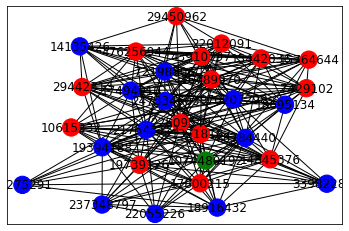

In [15]:
nx.draw_networkx(GCOLOR, node_color = colorlist)

In [16]:
for i, row in nodes_30[['id_str', 'name', 'party', 'followers_count']].iterrows():
    id_str, name, party, followers_count = row
    
    density = edge_weights[i]
    lab = str(name) + " | " + "Followers: " + str(followers_count) + " | " + "Degree: " + str(density)


    if party == "Democrat":
        GCOLOR.add_node(id_str, title=lab, color='#97c2fc', size=(followers_count**0.4)/15, label=name)
    elif party == "Republican":
        GCOLOR.add_node(id_str, title=lab, color='#fb7e80', size=(followers_count**0.4)/15, label=name)
    else:
        GCOLOR.add_node(id_str, title=lab, color='#c6f1ba', size=(followers_count**0.4)/15, label=name)


In [17]:
for i, row in nodes_30[['id_str', 'name', 'party', 'followers_count']].iterrows():
    id_str, name, party, followers_count = row
    
    density = edge_weights[i]
    lab = str(name) + " | " + "Followers: " + str(followers_count) + " | " + "Degree: " + str(density)


    if party == "Democrat":
        GCOLOR.add_node(id_str, title=lab, color='#bbd7fe', size=(followers_count**0.4)/15, label=name)
    elif party == "Republican":
        GCOLOR.add_node(id_str, title=lab, color='#fda2a4', size=(followers_count**0.4)/15, label=name)
    else:
        GCOLOR.add_node(id_str, title=lab, color='#c6f1ba', size=(followers_count**0.4)/15, label=name)


In [18]:
# pyvis

net = Network(notebook=True)
net.from_nx(GCOLOR)
net.barnes_hut(
    gravity=-10000, 
    central_gravity=0,
    spring_length=180,
    spring_strength = 0.04,
    damping=0.09,
    overlap=-10)
net.show_buttons(filter_=['physics'])
net.show("congress_twitter_network.html")